In [1]:
import sys
import os
import pandas as pd

import WonderPeaks.PeakStream as PS
from WonderPeaks.user_inputs import *
from WonderPeaks.PeakStream.PeakFlags import *
from WonderPeaks.PeakStream.Peakstream import *



## Load metadata, user inputs and genome annotations in .gtf format

In [2]:
directory = "/data/Megan/NGS_processing/Example_RNAseq_quant"
User_inputs_dict = initiate_user_inputs(directory)

def write_coordinate_file(GTF_file, skiprows = 0):
    dfGTF  = pd.read_csv(GTF_file, skiprows=skiprows,sep=  "\t", header = None)
    GTF_columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
    dfGTF.rename(columns = dict(zip(dfGTF.columns,GTF_columns )), inplace=True)

    dfGTF.sort_values(["seqname", "start"], inplace = True)
    coordinate_file = os.path.splitext(GTF_file)[0]+".csv"
    coordinate_file_path = os.path.join(directory, os.path.basename(coordinate_file))
    dfGTF.to_csv(coordinate_file_path, index=False)
    return coordinate_file_path


#   coordinate_file (converted .gff or gtf with coordinates for CDS, tRNA, rRNA, ssRNA, snoRNA)
# coordinate file will be saved in directory for your references
GTF_file = User_inputs_dict['genome_annotations_path']
coordinate_file = write_coordinate_file(GTF_file, skiprows = 0)
#    fasta_file with genome (chromosome names should match seqname in .gff or gtf)
genome_fasta_dir = User_inputs_dict['genome_fasta_path']





### Plot AT distribution across your genome

Searching for A/T stretches within genome...


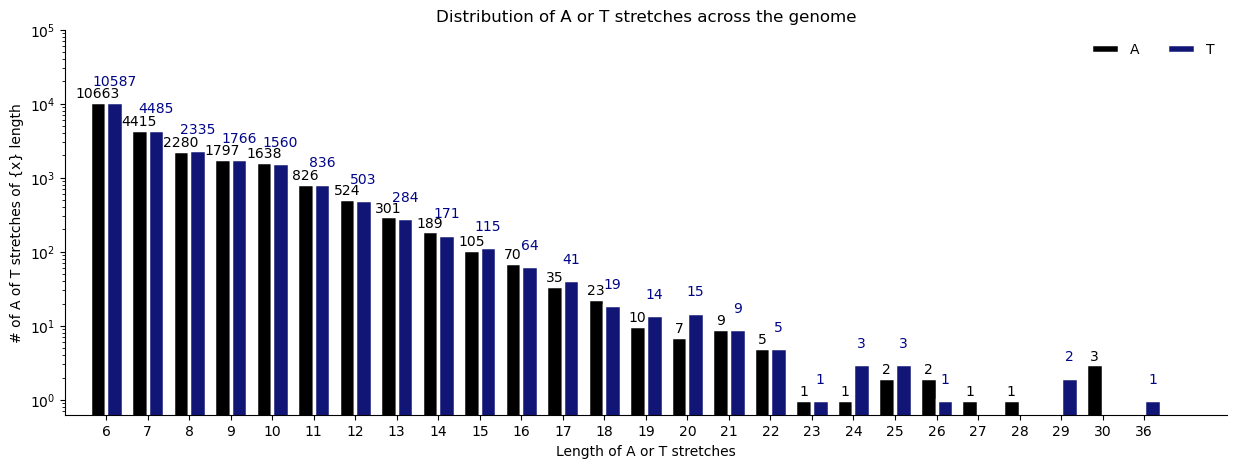

In [4]:
# plot AT distribution across your genome
AT = ATstretches(directory, coordinate_file, genome_fasta_dir, stretch_length = 6)
AT.plot_AT_dist()

### Run PeakStream

In [5]:
# initialize peakstream
PS = PeakStream(directory, coordinate_file, 
                  genome_fasta_dir,  n=10, stretch_length=6, 
                  User_inputs_dict= User_inputs_dict,
                  gene_biotypes = "protein_coding", #is protein_coding by defaul, running "protein_coding;rRNA" will include rRNA
                  rerun= True #can toggle to False
                  )

# run peakstream with feature counts
PS.PeakStream2featureCounts()


Running WonderPeaks for UTR assingment...
Centering peaks...
Linking A/T stretches within genome to gene coordinates...
Searching for A/T stretches within genome...
Linking A/T stretches within genome to gene coordinates...
Searching for A/T stretches within genome...
Linking peaks to gene coordinates...
Assigning peaks to A/T stretches within gene boundaries...
Assigning blacklisted (bl) peaks...
Finalizing assignments of peaks to gene coordinates...
Matching peaks to gene annotations...
Corrrecting counts based on CDS counts, and reasssigning attribute...
Running command: featureCounts -T 20 -t gene --extraAttributes gene_biotype -g gene_id -s 1 -a /data/sharedfiles/Ca22genome_Aallele/Candida_albicansGCA000182965v3.52_tuchntar.gtf -o /data/Megan/NGS_processing/Example_RNAseq_quant/featurecounts/gene_above30_STAR_counts.txt /data/Megan/NGS_processing/Example_RNAseq_quant/starout/sample14_SC5314_2_S115_L004_R1_001_fastp_output.fastq.gz_Aligned.sortedByCoord.out_above30.bam /data/Megan/


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 3 BAM files                                      ||
||                                                                            ||
||                           sample14_SC5314_2_S115_L004_R1_001_fastp_out ... ||
||                           sample15_SC5314_3_S116_L004_R1_001_fastp_out ... ||
||                           sample13_SC5314_1_S114_L004_R1_001_f

Making new coordinates file...
Annotating new coordinates...
Saving new coordinates data to /data/Megan/NGS_processing/Example_RNAseq_quant/PeakStream/PeakStream_new_coordinates_data.csv
PeakStream run completed. 
Saved new GTF file to /data/Megan/NGS_processing/Example_RNAseq_quant/PeakStream/Candida_albicansGCA000182965v3_Example_RNAseq_quant.gtf
Running command: featureCounts -T 20 -t predicted_3primeUTR --extraAttributes gene_biotype -g gene_id -s 1 -a /data/Megan/NGS_processing/Example_RNAseq_quant/PeakStream/Candida_albicansGCA000182965v3_Example_RNAseq_quant.gtf -o /data/Megan/NGS_processing/Example_RNAseq_quant/featurecounts/predicted_3primeUTR_above30_STAR_counts.txt /data/Megan/NGS_processing/Example_RNAseq_quant/starout/sample14_SC5314_2_S115_L004_R1_001_fastp_output.fastq.gz_Aligned.sortedByCoord.out_above30.bam /data/Megan/NGS_processing/Example_RNAseq_quant/starout/sample15_SC5314_3_S116_L004_R1_001_fastp_output.fastq.gz_Aligned.sortedByCoord.out_above30.bam /data/Megan/N


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 3 BAM files                                      ||
||                                                                            ||
||                           sample14_SC5314_2_S115_L004_R1_001_fastp_out ... ||
||                           sample15_SC5314_3_S116_L004_R1_001_fastp_out ... ||
||                           sample13_SC5314_1_S114_L004_R1_001_f

'/data/Megan/NGS_processing/Example_RNAseq_quant/featurecounts/predicted_3primeUTR_above30_STAR_counts-protein_coding.txt'

### Plot PeakStream reuslts

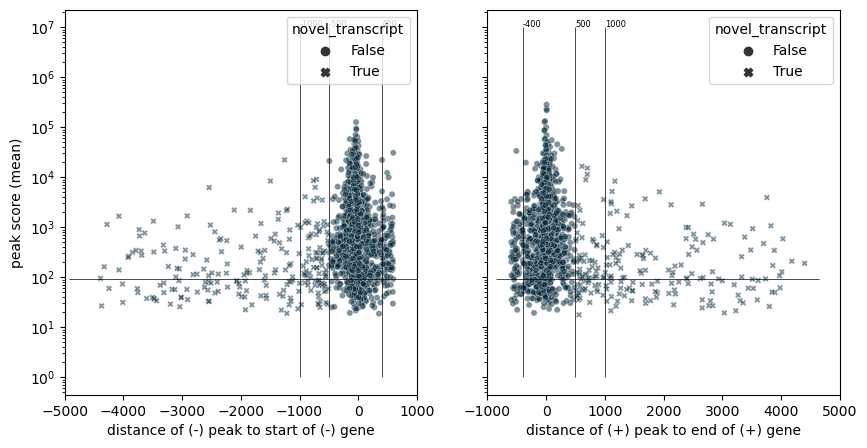

In [6]:

PS = PeakStream(directory, coordinate_file, 
                  genome_fasta_dir,  n=10, stretch_length=6, 
                  User_inputs_dict= User_inputs_dict, 
                  rerun= False
                  )
PS.plot_result()

